In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\garga\3D Objects\ELL784 Assn\Assn3\all.csv',header=None)
df.head

<bound method NDFrame.head of       0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2995    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2996    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2997    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2998    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2999    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

      778  779  780  781  782  78

In [3]:
X = pd.DataFrame(df.iloc[:,0:784])
X.head

<bound method NDFrame.head of       0    1    2    3    4    5    6    7    8    9    ...  774  775  776  \
0       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2995    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2996    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2997    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2998    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2999    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

      777  778  779  780  781  78

In [4]:
y = pd.DataFrame(df.iloc[:,784])
y.head

<bound method NDFrame.head of       784
0       0
1       0
2       0
3       0
4       0
...   ...
2995    9
2996    9
2997    9
2998    9
2999    9

[3000 rows x 1 columns]>

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)


In [20]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
#Normalizing features
X_train = X_train / 255
X_test = X_test / 255


In [7]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape

(2400, 784)

In [8]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=80)

Epoch 1/80
75/75 [==============================] - 0s 1ms/step - loss: 1.6199 - accuracy: 0.5587
Epoch 2/80
75/75 [==============================] - 0s 1ms/step - loss: 0.8968 - accuracy: 0.8154
Epoch 3/80
75/75 [==============================] - 0s 1ms/step - loss: 0.6729 - accuracy: 0.8558
Epoch 4/80
75/75 [==============================] - 0s 1ms/step - loss: 0.5674 - accuracy: 0.8754
Epoch 5/80
75/75 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.8829
Epoch 6/80
75/75 [==============================] - 0s 1ms/step - loss: 0.4586 - accuracy: 0.8875
Epoch 7/80
75/75 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8971
Epoch 8/80
75/75 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.9017
Epoch 9/80
75/75 [==============================] - 0s 1ms/step - loss: 0.3781 - accuracy: 0.9108
Epoch 10/80
75/75 [==============================] - 0s 1ms/step - loss: 0.3607 - accuracy: 0.9112
Epoch 11/80
75/75 [

In [9]:
model.evaluate(X_test, y_test)


19/19 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.8650


[0.4559858739376068, 0.8650000095367432]

In [10]:
y_predicted=model.predict(X_test)

19/19 [==============================] - 0s 2ms/step


In [11]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [12]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[66,  0,  0,  0,  0,  3,  0,  0,  1,  1],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 39,  4,  1,  0,  1,  3,  0,  0],
       [ 0,  1,  1, 47,  1,  1,  1,  0,  2,  0],
       [ 1,  0,  0,  0, 51,  0,  3,  1,  0,  7],
       [ 0,  0,  2,  2,  0, 55,  1,  0,  4,  0],
       [ 0,  0,  2,  0,  0,  0, 56,  0,  3,  0],
       [ 0,  0,  1,  0,  2,  0,  0, 60,  0,  0],
       [ 1,  0,  3,  1,  1,  8,  1,  1, 41,  2],
       [ 0,  0,  0,  3,  1,  2,  0,  6,  0, 49]])>

Text(69.0, 0.5, 'Truth')

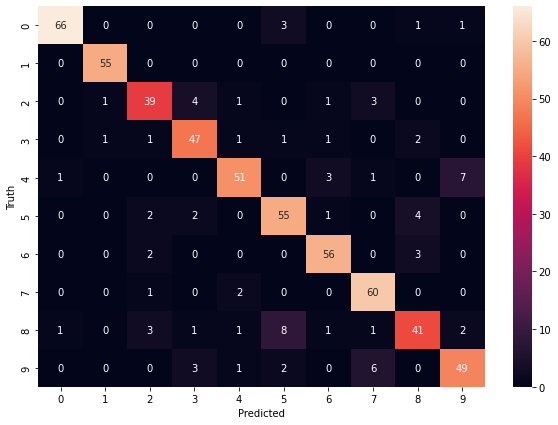

In [13]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [14]:
X_test.shape

(600, 784)

In [15]:
y_test.shape

(600, 1)

In [16]:
len(y_predicted_labels)

600

In [17]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100 , activation='relu'),
    keras.layers.Dense(100 , activation='relu'),
    keras.layers.Dense(100 , activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train, y_train, epochs=15)

Epoch 1/15
75/75 [==============================] - 1s 2ms/step - loss: 1.1735 - accuracy: 0.6575
Epoch 2/15
75/75 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8712
Epoch 3/15
75/75 [==============================] - 0s 2ms/step - loss: 0.2603 - accuracy: 0.9221
Epoch 4/15
75/75 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.9425
Epoch 5/15
75/75 [==============================] - 0s 2ms/step - loss: 0.1255 - accuracy: 0.9638
Epoch 6/15
75/75 [==============================] - 0s 2ms/step - loss: 0.1005 - accuracy: 0.9717
Epoch 7/15
75/75 [==============================] - 0s 2ms/step - loss: 0.0610 - accuracy: 0.9804
Epoch 8/15
75/75 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9862
Epoch 9/15
75/75 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9962
Epoch 10/15
75/75 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9967
Epoch 11/15
75/75 [

In [18]:
model2.evaluate(X_test,y_test)


19/19 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.9117


[0.4253714978694916, 0.9116666913032532]

19/19 [==============================] - 0s 2ms/step


Text(69.0, 0.5, 'Truth')

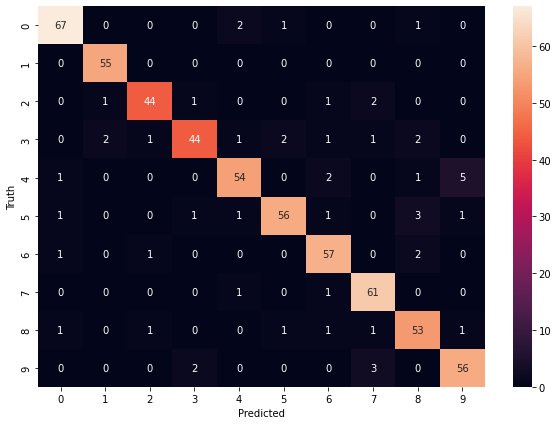

In [19]:
y_predicted = model2.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')